In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('monks-3.train', sep='\s+', skip_blank_lines=False, skipinitialspace=False, names=["class", 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'ID'])
df

,class,a1,a2,a3,a4,a5,a6,ID
0,1,1,1,1,1,1,2,data_2
1,1,1,1,1,1,2,1,data_3
2,1,1,1,1,1,2,2,data_4
3,0,1,1,1,1,3,1,data_5
4,0,1,1,1,1,4,1,data_7
...,...,...,...,...,...,...,...,...
117,0,3,3,2,2,2,2,data_420
118,0,3,3,2,2,3,2,data_422
119,0,3,3,2,3,1,1,data_425
120,0,3,3,2,3,3,2,data_430


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   122 non-null    int64 
 1   a1      122 non-null    int64 
 2   a2      122 non-null    int64 
 3   a3      122 non-null    int64 
 4   a4      122 non-null    int64 
 5   a5      122 non-null    int64 
 6   a6      122 non-null    int64 
 7   ID      122 non-null    object
dtypes: int64(7), object(1)
memory usage: 7.8+ KB


In [4]:
y_df = df[['class']]
y_df

,class
0,1
1,1
2,1
3,0
4,0
...,...
117,0
118,0
119,0
120,0


In [5]:
# Droppiamo 'class' e 'ID' e facciamo il one-hot enconding delle colonne 

X_df = df.drop(['class', 'ID'], axis=1)
X_df = pd.get_dummies(X_df, columns=X_df.columns)
X_df

,a1_1,a1_2,a1_3,a2_1,a2_2,a2_3,a3_1,a3_2,a4_1,a4_2,a4_3,a5_1,a5_2,a5_3,a5_4,a6_1,a6_2
0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1
1,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
2,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1
3,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0
4,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1
118,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1
119,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,0
120,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1


In [6]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   a1_1    122 non-null    uint8
 1   a1_2    122 non-null    uint8
 2   a1_3    122 non-null    uint8
 3   a2_1    122 non-null    uint8
 4   a2_2    122 non-null    uint8
 5   a2_3    122 non-null    uint8
 6   a3_1    122 non-null    uint8
 7   a3_2    122 non-null    uint8
 8   a4_1    122 non-null    uint8
 9   a4_2    122 non-null    uint8
 10  a4_3    122 non-null    uint8
 11  a5_1    122 non-null    uint8
 12  a5_2    122 non-null    uint8
 13  a5_3    122 non-null    uint8
 14  a5_4    122 non-null    uint8
 15  a6_1    122 non-null    uint8
 16  a6_2    122 non-null    uint8
dtypes: uint8(17)
memory usage: 2.2 KB


In [7]:
# nessun missing value
df.isna().sum()

class    0
a1       0
a2       0
a3       0
a4       0
a5       0
a6       0
ID       0
dtype: int64

In [8]:
df['ID']

0        data_2
1        data_3
2        data_4
3        data_5
4        data_7
         ...   
117    data_420
118    data_422
119    data_425
120    data_430
121    data_432
Name: ID, Length: 122, dtype: object

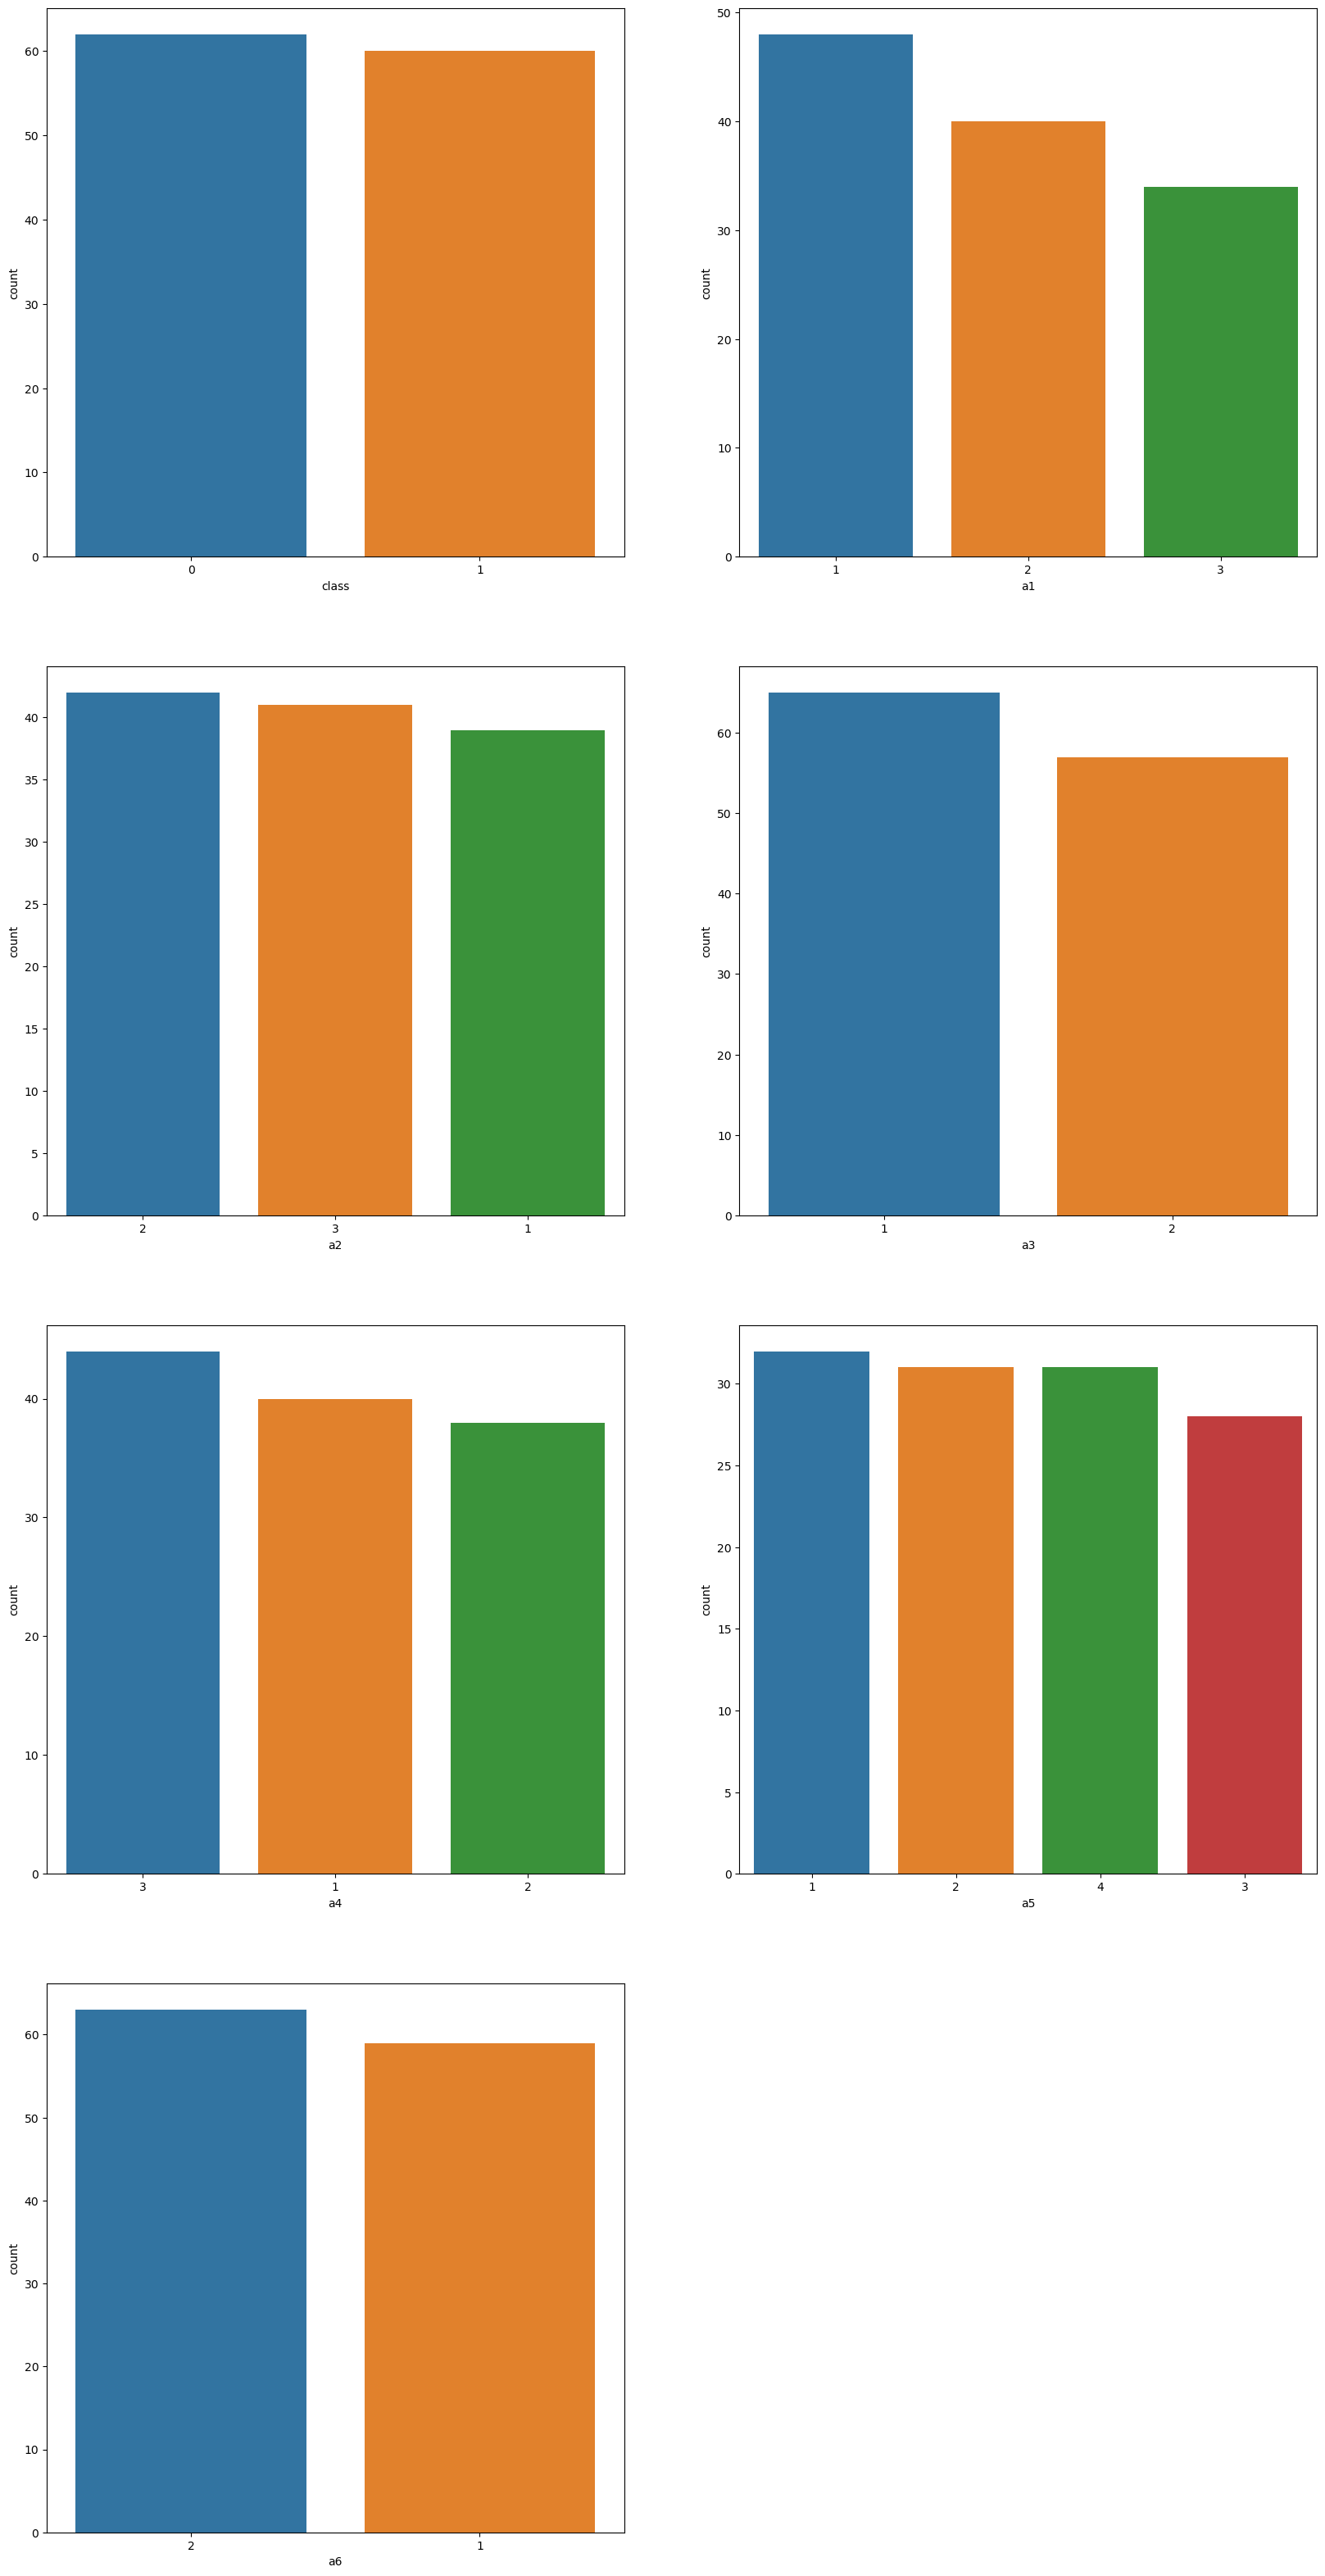

In [9]:
def plot_all_cat_distributions(dataframe, figsize = (20,40)):
    """ Plot every single category frequency distribution in the same cell"""
    max_shape = int(np.ceil(dataframe.shape[1] / 2))
    fig = plt.figure(figsize=figsize)
    for i, col in enumerate(dataframe.columns):
        plt.subplot(max_shape, 2, i+1)
        _ = sns.countplot(x = col, data = dataframe, order=dataframe[col].value_counts().index)
    plt.show()

plot_all_cat_distributions(df.drop(['ID'], axis=1))